In [1]:
# imports
import pandas as pd
import numpy as np

In [2]:
# fetch manga csv
manga_df = pd.read_csv('./data/manga.csv')
manga_df.head()

,manga_id,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,...,demographics,authors,serializations,synopsis,background,main_picture,url,title_english,title_japanese,title_synonyms
0,2,Berserk,manga,9.47,319696,currently_publishing,NaN,NaN,1989-08-25,NaN,...,['Seinen'],"[{'id': 1868, 'first_name': 'Kentarou', 'last_...",['Young Animal'],"Guts, a former mercenary now known as the ""Bla...",Berserk won the Award for Excellence at the si...,https://cdn.myanimelist.net/images/manga/1/157...,https://myanimelist.net/manga/2/Berserk,Berserk,ベルセルク,['Berserk: The Prototype']
1,13,One Piece,manga,9.22,355375,currently_publishing,NaN,NaN,1997-07-22,NaN,...,['Shounen'],"[{'id': 1881, 'first_name': 'Eiichiro', 'last_...",['Shounen Jump (Weekly)'],"Gol D. Roger, a man referred to as the ""King o...",One Piece is the highest selling manga series ...,https://cdn.myanimelist.net/images/manga/2/253...,https://myanimelist.net/manga/13/One_Piece,One Piece,ONE PIECE,[]
2,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.30,151433,finished,24.0,96.0,2004-01-19,2011-04-19,...,"['Seinen', 'Shounen']","[{'id': 2619, 'first_name': 'Hirohiko', 'last_...",['Ultra Jump'],"In the American Old West, the world's greatest...",JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...,https://cdn.myanimelist.net/images/manga/3/179...,https://myanimelist.net/manga/1706/JoJo_no_Kim...,NaN,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,"[""JoJo's Bizarre Adventure Part 7: Steel Ball ..."
3,4632,Oyasumi Punpun,manga,9.02,168459,finished,13.0,147.0,2007-03-15,2013-11-02,...,['Seinen'],"[{'id': 2836, 'first_name': 'Inio', 'last_name...",['Big Comic Spirits'],Punpun Onodera is a normal 11-year-old boy liv...,Oyasumi Punpun was originally serialized in Yo...,https://cdn.myanimelist.net/images/manga/3/266...,https://myanimelist.net/manga/4632/Oyasumi_Punpun,Goodnight Punpun,おやすみプンプン,[]
4,25,Fullmetal Alchemist,manga,9.03,153151,finished,27.0,116.0,2001-07-12,2010-09-11,...,['Shounen'],"[{'id': 1874, 'first_name': 'Hiromu', 'last_na...",['Shounen Gangan'],Alchemists are knowledgeable and naturally tal...,Hagane no Renkinjutsushi won the 49th Shogakuk...,https://cdn.myanimelist.net/images/manga/3/243...,https://myanimelist.net/manga/25/Fullmetal_Alc...,Fullmetal Alchemist,鋼の錬金術師,"['Full Metal Alchemist', 'Hagane no Renkinjuts..."


In [3]:
# get columns
columns = manga_df.columns
print(columns)

# get all genres
genres = manga_df['genres']
grenres = genres.dropna()
grenres

Index(['manga_id', 'title', 'type', 'score', 'scored_by', 'status', 'volumes',
       'chapters', 'start_date', 'end_date', 'members', 'favorites', 'sfw',
       'approved', 'created_at_before', 'updated_at', 'real_start_date',
       'real_end_date', 'genres', 'themes', 'demographics', 'authors',
       'serializations', 'synopsis', 'background', 'main_picture', 'url',
       'title_english', 'title_japanese', 'title_synonyms'],
      dtype='object')


0        ['Action', 'Adventure', 'Award Winning', 'Dram...
1                       ['Action', 'Adventure', 'Fantasy']
2        ['Action', 'Adventure', 'Mystery', 'Supernatur...
3                               ['Drama', 'Slice of Life']
4        ['Action', 'Adventure', 'Award Winning', 'Dram...
                               ...                        
64828                          ['Romance', 'Supernatural']
64829                           ['Comedy', 'Supernatural']
64830                          ['Romance', 'Supernatural']
64831                                           ['Comedy']
64832                                 ['Action', 'Sci-Fi']
Name: genres, Length: 64833, dtype: object

In [4]:
import ast

# get unique genres
unique_genres = []

for genre in grenres:
    genre = ast.literal_eval(genre)
    unique_genres.extend(genre)

unique_genres = list(set(unique_genres))
unique_genres

['Comedy',
 'Hentai',
 'Erotica',
 'Gourmet',
 'Suspense',
 'Action',
 'Horror',
 'Ecchi',
 'Fantasy',
 'Sci-Fi',
 'Award Winning',
 'Sports',
 'Mystery',
 'Romance',
 'Avant Garde',
 'Slice of Life',
 'Girls Love',
 'Boys Love',
 'Adventure',
 'Supernatural',
 'Drama']

In [47]:
# fetch title, score, and genres of manga from the dataframe
data = manga_df[['title', 'score', 'genres', 'favorites', 'synopsis', 'demographics']]

# convert genres to list
data = data.drop_duplicates(subset='title')
data['genres'] = data['genres'].apply(lambda x: ast.literal_eval(x))
data['demographics'] = data['demographics'].apply(lambda x: ast.literal_eval(x))
data.dropna(subset=['title'], inplace=True)
data

,title,score,genres,favorites,synopsis,demographics
0,Berserk,9.47,"[Action, Adventure, Award Winning, Drama, Fant...",119470,"Guts, a former mercenary now known as the ""Bla...",[Seinen]
1,One Piece,9.22,"[Action, Adventure, Fantasy]",111462,"Gol D. Roger, a man referred to as the ""King o...",[Shounen]
2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.30,"[Action, Adventure, Mystery, Supernatural]",41713,"In the American Old West, the world's greatest...","[Seinen, Shounen]"
3,Oyasumi Punpun,9.02,"[Drama, Slice of Life]",49361,Punpun Onodera is a normal 11-year-old boy liv...,[Seinen]
4,Fullmetal Alchemist,9.03,"[Action, Adventure, Award Winning, Drama, Fant...",29634,Alchemists are knowledgeable and naturally tal...,[Shounen]
...,...,...,...,...,...,...
64827,Sukidarake Horoyoi Joshi to Icha Ero Dekichau:...,NaN,[Ecchi],0,A collection of stories about drunken girls.,[]
64828,Raise wa Kimi no Mono,NaN,"[Romance, Supernatural]",0,Saya is living under strained family circumsta...,[Shoujo]
64829,Ore to Basil no Automata,NaN,"[Comedy, Supernatural]",0,"Kamiya Mitsugu, a perverted high school studen...",[]
64830,Happy Candy Virus,NaN,"[Romance, Supernatural]",0,NaN,[]


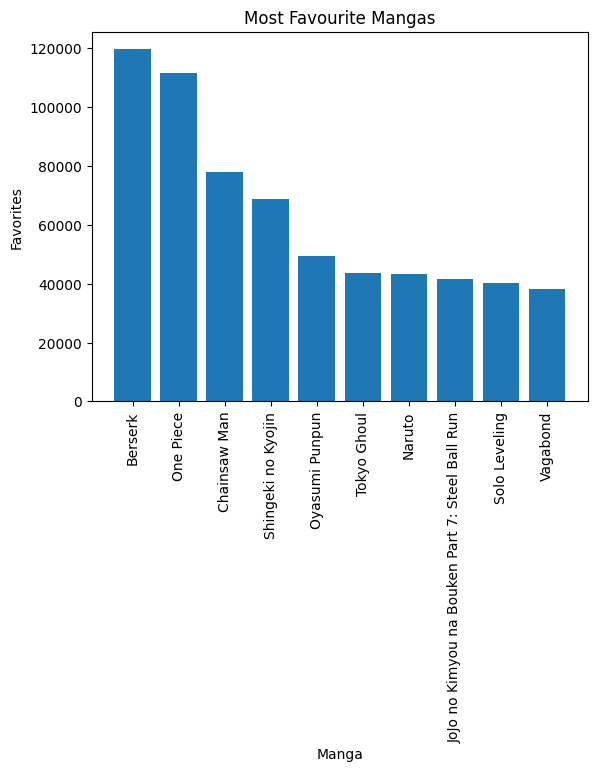

In [48]:
# visualize data
import matplotlib.pyplot as plt

# plot most favourite mangas
favorites = data.sort_values(by='favorites', ascending=False)
favorites = favorites.head(10)
plt.bar(favorites['title'], favorites['favorites'])
plt.title('Most Favourite Mangas')
plt.xlabel('Manga')
plt.ylabel('Favorites')
plt.xticks(rotation=90)
plt.show()


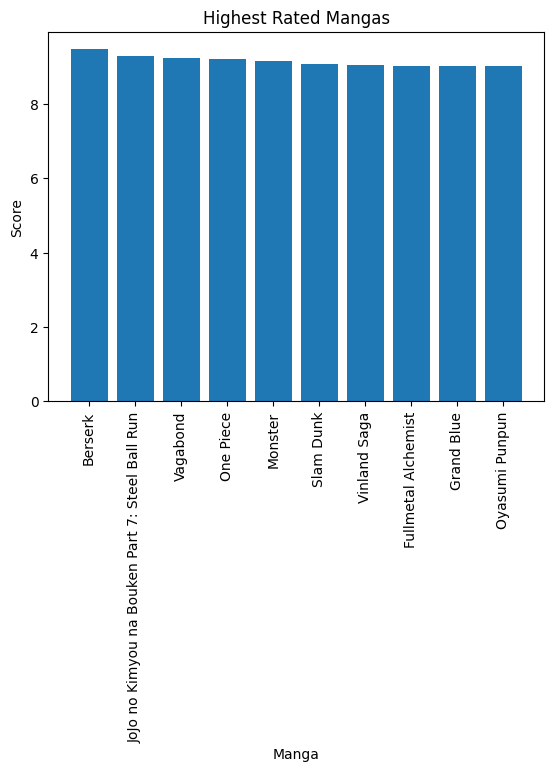

In [49]:
# plot highest rated mangas
highest_rated = data.sort_values(by='score', ascending=False)
highest_rated = highest_rated.head(10)
plt.bar(highest_rated['title'], highest_rated['score'])
plt.title('Highest Rated Mangas')
plt.xlabel('Manga')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.show()

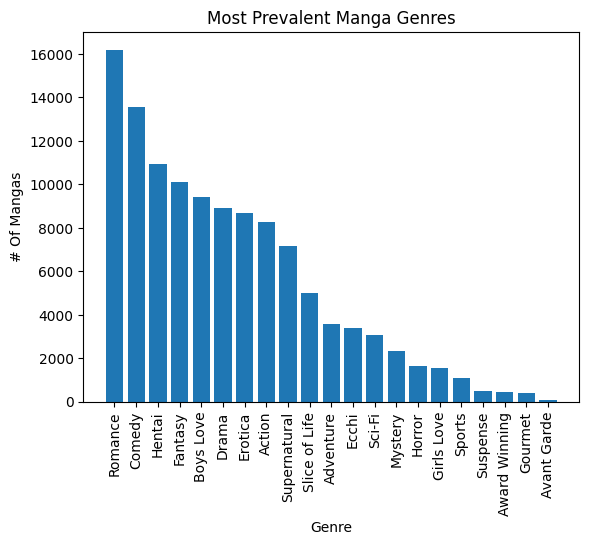

In [50]:
# plot most prevalent manga genres
genre_count = {}

for genre in unique_genres:
    genre_count[genre] = 0

for genre in data['genres']:
    for g in genre:
        genre_count[g] += 1

genre_count = dict(sorted(genre_count.items(), key=lambda x: x[1], reverse=True))
plt.bar(genre_count.keys(), genre_count.values())
plt.title('Most Prevalent Manga Genres')
plt.xlabel('Genre')
plt.ylabel('# Of Mangas')
plt.xticks(rotation=90)
plt.show()

# Observations:

- Most manga genres are 'Romance', 'Comedy', 'Boys Love', 'Drama', among others;
    - Similar genres corresponding to the 'Shoujo' audience.
- Highest rated/favorited mangas are of 'Shounen' variety:
    - Berserk: 'Action', 'Adventure'; One Piece: 'Action', 'Adventure', etc.

# Approach 1:

## Custom Manga Reccomendation Algorithm
We want to reccommend similar types of mangas based off of the users selection. Important components for a manga reccomendation include `genres`, `synopsis`, `score`, `favorites`, and `demographic`. We will attempt to create such an algorithm in a step-by-step process.

In [51]:
# prepare genre data

genre_data = data[['title', 'genres']]

for genre in unique_genres:
    genre_data[genre.lower()] = genre_data.loc[:, 'genres'].apply(lambda x: 1 if genre in x else 0)

genre_data.drop(columns=['genres'], inplace=True)
genre_data

/var/folders/f8/t7d8bncn5cjgsy5zn3mz7l280000gn/T/ipykernel_4706/1510362240.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_data[genre.lower()] = genre_data.loc[:, 'genres'].apply(lambda x: 1 if genre in x else 0)
/var/folders/f8/t7d8bncn5cjgsy5zn3mz7l280000gn/T/ipykernel_4706/1510362240.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_data[genre.lower()] = genre_data.loc[:, 'genres'].apply(lambda x: 1 if genre in x else 0)
/var/folders/f8/t7d8bncn5cjgsy5zn3mz7l280000gn/T/ipykernel_4706/15

,title,comedy,hentai,erotica,gourmet,suspense,action,horror,ecchi,fantasy,...,sports,mystery,romance,avant garde,slice of life,girls love,boys love,adventure,supernatural,drama
0,Berserk,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,1,1
1,One Piece,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3,Oyasumi Punpun,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,Fullmetal Alchemist,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64827,Sukidarake Horoyoi Joshi to Icha Ero Dekichau:...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
64828,Raise wa Kimi no Mono,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
64829,Ore to Basil no Automata,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
64830,Happy Candy Virus,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [95]:
# reccomend manga based on similar genres

def get_by_genres(genre_data, genre_weights: dict[str, float]):
    ''' Return a df of mangas and weighted probabilities based on genres specified in genre_weights.
        'genre_prob' column is how close the genres in the mangas match genre_weights weights.
        
        I.e. genre_weights = {'romance': 0.5, 'comedy': 0.2}
        will return a df with 'genre_prob' 
        = genre_data['shounen'] * genre_weights['romance'] + genre_data['seinen'] * genre_weights['romance'].
    '''

    req_columns = ['title']

    try:
        # get demo probabilities
        genre_prob_df = genre_data.loc[:, req_columns + list(genre_weights.keys())]
        genre_prob_df['genre_prob'] = genre_prob_df.iloc[:, len(req_columns):].apply(lambda x: np.dot(x, list(genre_weights.values())), axis=1)
        return genre_prob_df
    except Exception as e:
        print(e)
        return None

In [99]:
# get reccomendations based on genres

genre_weights = {'romance': 0.5, 'comedy': 0.2}

recs = get_by_genres(genre_data, genre_weights)
recs.sample(5)

,title,romance,comedy,genre_prob
13173,Kozouya Dokuhon LS,1,1,0.7
63719,Tate Roll,0,1,0.2
44118,Naka made Yasashiku Hotte,0,0,0.0
26593,Ginga Eiyuu Densetsu Gaiden,0,0,0.0
43394,Houchounin Ajihei,0,0,0.0


In [54]:
# prepare audience df
audience_data = data[['title', 'score', 'favorites', 'demographics']]
audience_data


,title,score,favorites,demographics
0,Berserk,9.47,119470,[Seinen]
1,One Piece,9.22,111462,[Shounen]
2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.30,41713,"[Seinen, Shounen]"
3,Oyasumi Punpun,9.02,49361,[Seinen]
4,Fullmetal Alchemist,9.03,29634,[Shounen]
...,...,...,...,...
64827,Sukidarake Horoyoi Joshi to Icha Ero Dekichau:...,NaN,0,[]
64828,Raise wa Kimi no Mono,NaN,0,[Shoujo]
64829,Ore to Basil no Automata,NaN,0,[]
64830,Happy Candy Virus,NaN,0,[]


In [55]:
# get unique demographics
unique_demographics = set()
for demographic in audience_data['demographics']:
    unique_demographics.update(demographic)

unique_demographics = list(unique_demographics)
unique_demographics

['Seinen', 'Shoujo', 'Shounen', 'Kids', 'Josei']

In [56]:
# update audience df into binary columns
for demographic in unique_demographics:
    audience_data[demographic.lower()] = audience_data.loc[:, 'demographics'].apply(lambda x: 1 if demographic in x else 0)

audience_data.drop(columns=['demographics'], inplace=True)
audience_data

/var/folders/f8/t7d8bncn5cjgsy5zn3mz7l280000gn/T/ipykernel_4706/2260483555.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  audience_data[demographic.lower()] = audience_data.loc[:, 'demographics'].apply(lambda x: 1 if demographic in x else 0)


,title,score,favorites,seinen,shoujo,shounen,kids,josei
0,Berserk,9.47,119470,1,0,0,0,0
1,One Piece,9.22,111462,0,0,1,0,0
2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.30,41713,1,0,1,0,0
3,Oyasumi Punpun,9.02,49361,1,0,0,0,0
4,Fullmetal Alchemist,9.03,29634,0,0,1,0,0
...,...,...,...,...,...,...,...,...
64827,Sukidarake Horoyoi Joshi to Icha Ero Dekichau:...,NaN,0,0,0,0,0,0
64828,Raise wa Kimi no Mono,NaN,0,0,1,0,0,0
64829,Ore to Basil no Automata,NaN,0,0,0,0,0,0
64830,Happy Candy Virus,NaN,0,0,0,0,0,0


In [60]:
# get user recommendation score

def get_by_users(audience_data, demo_weights: dict[str, float]):
    ''' Return a df of mangas and weighted probabilities based on demographics specified in demo_weights.
        'demo_prob' column is how close the demographics in the mangas match demo_weights weights.
        
        I.e. demo_weights = {'shounen': 0.5, 'seinen': 0.5}
        will return a df with 'demo_prob' 
        = audience_data['shounen'] * demo_weights['shounen'] + audience_data['seinen'] * demo_weights['seinen'].
    '''
    req_columns = ['title']

    try:
        # get demo probabilities
        demo_prob_df = audience_data.loc[:, req_columns + list(demo_weights.keys())]
        demo_prob_df['demo_prob'] = demo_prob_df.iloc[:, len(req_columns):].apply(lambda x: np.dot(x, list(demo_weights.values())), axis=1)
        return demo_prob_df
    except Exception as e:
        print(e)
        return

In [94]:
# test demo weights recommendation

demo_weights = {'shounen': 0.5, 'seinen': 0.3}
demo_prob_df = get_by_users(audience_data, demo_weights)
demo_prob_df.sample(5)

,title,shounen,seinen,demo_prob
63701,Shunkashuutou Daikousha: Akatsuki no Shashu,0,0,0.0
47219,Sakura Code,0,1,0.3
7515,Bokura no Mitsudomoe Sensou,0,0,0.0
32826,Legacy,1,0,0.5
51798,Ore Eiyuu Densetsu: Soshite Kanojo wa Kawatte ...,0,0,0.0


In [12]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/neil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [106]:
# remove stopwords from manga synopsis

# fetch stopwords
stop_words = set(stopwords.words('english'))

desc_data = data.loc[:, ['title', 'synopsis', 'score']]
desc_data = desc_data.dropna(subset=['synopsis'])
desc_data


,title,synopsis,score
0,Berserk,"Guts, a former mercenary now known as the ""Bla...",9.47
1,One Piece,"Gol D. Roger, a man referred to as the ""King o...",9.22
2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,"In the American Old West, the world's greatest...",9.30
3,Oyasumi Punpun,Punpun Onodera is a normal 11-year-old boy liv...,9.02
4,Fullmetal Alchemist,Alchemists are knowledgeable and naturally tal...,9.03
...,...,...,...
64826,Itazura na Ai no Shisha,"Ellie, who works at a law firm, is at her wits...",NaN
64827,Sukidarake Horoyoi Joshi to Icha Ero Dekichau:...,A collection of stories about drunken girls.,NaN
64828,Raise wa Kimi no Mono,Saya is living under strained family circumsta...,NaN
64829,Ore to Basil no Automata,"Kamiya Mitsugu, a perverted high school studen...",NaN


In [108]:
# remove stopwords, punctuations and special chars from manga synopsis
desc_data['synopsis'] = desc_data['synopsis'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words and word.isalnum()]))
desc_data

,title,synopsis,score
0,Berserk,former mercenary known tumultuous finally find...,9.47
1,One Piece,Gol man referred set executed World confirms e...,9.22
2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,American Old greatest race Thousands line San ...,9.30
3,Oyasumi Punpun,Punpun Onodera normal boy living Hopelessly id...,9.02
4,Fullmetal Alchemist,Alchemists knowledgeable naturally talented in...,9.03
...,...,...,...
64826,Itazura na Ai no Shisha,works law end problematic divorce client Itali...,NaN
64827,Sukidarake Horoyoi Joshi to Icha Ero Dekichau:...,collection stories drunken,NaN
64828,Raise wa Kimi no Mono,Saya living strained family circumstances fath...,NaN
64829,Ore to Basil no Automata,Kamiya perverted high school tried kissing thr...,NaN


In [119]:
# get all unique words from manga synopsis'

all_synopsis = desc_data['synopsis'].tolist()
all_synopsis = ' '.join(all_synopsis)
unique_words = list(set(all_synopsis.split()))
unique_words[:10]

['Ranchi',
 'Shiwase',
 'shrewd',
 'Akaba',
 'Milvia',
 'Kowagari',
 'Trendy',
 'Vatonage',
 'angles',
 'unable']

In [120]:
# tokenize words

word_to_index = {word: i for i, word in enumerate(unique_words)}
index_to_word = {i: word for i, word in enumerate(unique_words)}

In [125]:
# test tokinization

from random import sample

sample_words = sample(unique_words, 10)
print(sample_words)

for word in sample_words:
    print(f'{word} -> {word_to_index[word]} -> {index_to_word[word_to_index[word]]}')

['Hyoryuroku', 'Helheim', 'SM', 'Elhazard', 'professionalism', 'distract', 'Shuuaku', 'Kakozato', 'Nando', 'Shinobiyoru']
Hyoryuroku -> 71393 -> Hyoryuroku
Helheim -> 68409 -> Helheim
SM -> 27057 -> SM
Elhazard -> 55046 -> Elhazard
professionalism -> 1836 -> professionalism
distract -> 42135 -> distract
Shuuaku -> 74802 -> Shuuaku
Kakozato -> 3013 -> Kakozato
Nando -> 62994 -> Nando
Shinobiyoru -> 1864 -> Shinobiyoru


In [126]:
# tokenize synopsis
from collections import Counter

desc_data['key_words'] = desc_data.loc[:, 'synopsis'].apply(lambda x: Counter(x.split()))
desc_data = desc_data.drop(columns=['synopsis'])
desc_data


,title,score,key_words
0,Berserk,9.47,"{'former': 1, 'mercenary': 1, 'known': 1, 'tum..."
1,One Piece,9.22,"{'Gol': 1, 'man': 2, 'referred': 1, 'set': 1, ..."
2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.30,"{'American': 1, 'Old': 1, 'greatest': 1, 'race..."
3,Oyasumi Punpun,9.02,"{'Punpun': 3, 'Onodera': 1, 'normal': 1, 'boy'..."
4,Fullmetal Alchemist,9.03,"{'Alchemists': 1, 'knowledgeable': 1, 'natural..."
...,...,...,...
64826,Itazura na Ai no Shisha,NaN,"{'works': 1, 'law': 1, 'end': 2, 'problematic'..."
64827,Sukidarake Horoyoi Joshi to Icha Ero Dekichau:...,NaN,"{'collection': 1, 'stories': 1, 'drunken': 1}"
64828,Raise wa Kimi no Mono,NaN,"{'Saya': 1, 'living': 1, 'strained': 1, 'famil..."
64829,Ore to Basil no Automata,NaN,"{'Kamiya': 1, 'perverted': 1, 'high': 1, 'scho..."


In [16]:
# manga recommendation algorithm

class MyReccomendations():
    def __init__(self, genre_data, audience_data, desc_data, unique_demographics, unique_genres):
        self.genre_data = genre_data
        self.audience_data = audience_data
        self.desc_data = desc_data
        self.demo_weights = {demo: 0 for demo in unique_demographics}
        self.genre_weights = {genre: 0 for genre in unique_genres}
    
    def word_to_index(self, unique_words):
        ''' Return a dict of unique words to their index in the unique_words list. '''
        self.word_token = {word: i for i, word in enumerate(unique_words)}
    
    def index_to_word(self, unique_words):
        ''' Return a dict of index to unique words in the unique_words list.'''
        self.index_token =  {i: word for i, word in enumerate(unique_words)}



In [17]:
# import GMM model and metrics
from sklearn import mixture
from sklearn import metrics

In [18]:
# would you like this manga classification; [0, 1] output, based on genres, score, and favorites